In [28]:
from haversine import haversine

import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('data/data_for_distance.csv')

In [30]:
data.head()

,OBJECTID_x,ID,start_lon,start_lan,pH,As,Cd,Ni,Pb,Zn,Hg,Lon,Lan,lon_degree,lon_minute,lon_sec,lan_degree,lan_minute,lan_sec
0,1,KW-SK-S-36,128.4836,37.0751,7.63,17.46,0.480,1.65,91.10,NaN,0.0,128.781056,37.114472,128,46,51.8,37,6,52.1
1,2,KW-SK-S-37,128.4836,37.0751,5.25,1.25,0.050,0.34,58.77,NaN,0.0,128.774083,37.113194,128,46,26.7,37,6,47.5
2,3,KW-SK-S-66,128.4836,37.0751,7.72,1.39,0.070,0.59,92.43,NaN,0.0,128.789000,37.119861,128,47,20.4,37,7,11.5
3,4,KW-SK-CS-03,128.4836,37.0751,8.41,6.07,0.105,1.14,2.75,NaN,0.0,128.846444,37.112389,128,50,47.2,37,6,44.6
4,5,KW-YH-PS-01,129.0646,37.0629,8.30,32.70,3.700,1.10,4700.00,NaN,0.0,129.138417,37.102444,129,8,18.3,37,6,8.8


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID_x  1458 non-null   int64  
 1   ID          1458 non-null   object 
 2   start_lon   1458 non-null   float64
 3   start_lan   1458 non-null   float64
 4   pH          1458 non-null   float64
 5   As          1458 non-null   float64
 6   Cd          1458 non-null   float64
 7   Ni          1458 non-null   float64
 8   Pb          757 non-null    float64
 9   Zn          337 non-null    object 
 10  Hg          1458 non-null   float64
 11  Lon         1458 non-null   float64
 12  Lan         1458 non-null   float64
 13  lon_degree  1458 non-null   int64  
 14  lon_minute  1458 non-null   int64  
 15  lon_sec     1458 non-null   float64
 16  lan_degree  1458 non-null   int64  
 17  lan_minute  1458 non-null   int64  
 18  lan_sec     1458 non-null   float64
dtypes: float64(12), int64(5), o

### Convert Lan, Lon to Distance

In [32]:
dis_data = []

for i in range(0, len(data)):
    start = (data.loc[i,'start_lan'], data.loc[i,'start_lon'])
    target = (data.loc[i,'Lan'], data.loc[i,'Lon'])
    
    dis_data.append(haversine(start, target, unit='km'))

In [36]:
len(dis_data)

1458

In [37]:
data['distance'] = dis_data

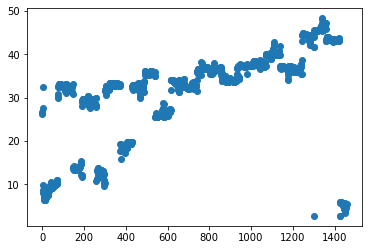

In [38]:
plt.scatter(data.index, data['distance'])

In [39]:
data.to_csv('distance.csv', sep=',')